In [18]:
%load_ext autoreload
%autoreload 2

In [52]:
import os 
import sys

proj_root = os.path.dirname(os.path.abspath("."))
# print(proj_root)
sys.path.append(proj_root)

from minatar_dqn.utils import visualization as my_viz

In [53]:
experiment_folder = r"D:\Work\PhD\minatar_work\experiments\training\outputs\2023_03_01-00_21_40\conv_model_16\breakout\0"

train_log_file_name = os.path.join(
    experiment_folder, "conv_model_16_breakout_0_train_stats"
)

training_stats, validation_stats = my_viz.load_training_stats(train_log_file_name)

FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Work\\PhD\\minatar_work\\experiments\\training\\outputs\\2023_03_01-00_21_40\\conv_model_16\\breakout\\0\\conv_model_16_breakout_0_train_stats'

In [ ]:
validation_stats[0]

{'frame_stamp': 200000,
 'episode_rewards': {'min': None,
  'max': None,
  'mean': None,
  'median': None,
  'std': None},
 'episode_frames': {'min': None,
  'max': None,
  'mean': None,
  'median': None,
  'std': None},
 'episode_max_qs': {'min': None,
  'max': None,
  'mean': None,
  'median': None,
  'std': None},
 'epoch_time': datetime.timedelta(seconds=12, microseconds=533569)}

In [ ]:
validation_stats[1]

{'frame_stamp': 400000,
 'episode_rewards': {'min': 1.0,
  'max': 9.0,
  'mean': 6.856435643564357,
  'median': 6.0,
  'std': 1.034479749182559},
 'episode_frames': {'min': 16,
  'max': 106,
  'mean': 82.54455445544555,
  'median': 74.0,
  'std': 10.477722479902132},
 'episode_max_qs': {'min': 2.1044185161590576,
  'max': 8.448046684265137,
  'mean': 7.068287637135754,
  'median': 7.175458908081055,
  'std': 1.066114160561134},
 'epoch_time': datetime.timedelta(seconds=9, microseconds=973470)}

In [ ]:
validation_stats[-1]


{'frame_stamp': 2000000,
 'episode_rewards': {'min': 6.0,
  'max': 50.0,
  'mean': 25.745454545454546,
  'median': 15.0,
  'std': 11.190718310659953},
 'episode_frames': {'min': 72,
  'max': 628,
  'mean': 303.27272727272725,
  'median': 178.0,
  'std': 130.74390251203738},
 'episode_max_qs': {'min': 0.24853990972042084,
  'max': 16.373796463012695,
  'mean': 8.788988962908446,
  'median': 7.208001136779785,
  'std': 3.4564179026740036},
 'epoch_time': datetime.timedelta(seconds=10, microseconds=819214)}

In [ ]:
# df = my_viz.get_df_of_stat(validation_stats, stat_name="episode_rewards", show_epochs=True)
df = my_viz.get_df_of_stat(validation_stats, stat_name="episode_frames", show_epochs=True)

In [ ]:
df

,epoch,min,max,mean,median,std
0,1.0,16,62,38.000000,38.0,0.995430
1,2.0,16,106,82.544554,74.0,10.477722
2,3.0,16,186,111.669643,96.0,18.170762
3,4.0,60,196,188.240602,186.0,16.726077
4,5.0,8,192,185.200000,182.0,15.515249
5,6.0,26,212,196.929134,194.0,21.699879
6,7.0,174,49204,16814.666667,1066.0,22905.612141
7,8.0,242,36814,10289.600000,3522.0,13793.964268
8,9.0,406,40676,13287.500000,6034.0,15979.917170
9,10.0,72,628,303.272727,178.0,130.743903


In [ ]:
game = "breakout"
proj_dir = os.path.abspath(".")
default_checkpoint_folder = os.path.join(proj_dir, "checkpoints", game)

checkpoint_folder = default_checkpoint_folder

model_file_name = os.path.join(checkpoint_folder, game + "_model")
replay_buffer_file = os.path.join(checkpoint_folder, game + "_replay_buffer")
train_stats_file = os.path.join(checkpoint_folder, game + "_train_stats")
logs_path = os.path.join(checkpoint_folder, "logs")

Path(checkpoint_folder).mkdir(parents=True, exist_ok=True)
Path(logs_path).mkdir(parents=True, exist_ok=True)

env = Environment(game)

train_logger = setup_logger(game)

# print("Cuda available?: " + str(torch.cuda.is_available()))
my_agent = AgentDQN(
        env=env,
        model_file=model_file_name,
        replay_buffer_file=replay_buffer_file,
        train_stats_file=train_stats_file,
        save_checkpoints=True,
        logger=train_logger,
    )


In [ ]:
my_agent.train(1)

In [ ]:
# my_agent.replay_buffer.save(replay_buffer_file)

In [ ]:
s = get_state(my_agent.env.state())
s.shape

torch.Size([1, 4, 10, 10])

In [ ]:
s.data.dtype

In [ ]:
my_agent.get_action_from_model(s)

tensor([[4]])

In [ ]:
with torch.no_grad():
    res = my_agent.policy_model(s).max(1)
res

torch.return_types.max(
values=tensor([11.4790]),
indices=tensor([4]))

In [ ]:
res[0].item()

11.478989601135254

In [ ]:
res[1].view(1, 1)

tensor([[4]])

In [ ]:
# [1].view(1, 1)

In [ ]:
action = my_agent.select_action(s, my_agent.t, my_agent.num_actions)
reward, is_terminated = my_agent.env.act(action)
reward = torch.tensor([[reward]], device="cpu").float()
is_terminated = torch.tensor([[is_terminated]], device="cpu")
s_prime = get_state(my_agent.env.state())

In [ ]:
s_prime.dtype

In [ ]:
sample = my_agent.replay_buffer.sample(1)
len(sample)

In [ ]:
sample[0][0][0][0][0]
type(sample[0][0][0][0][0])

In [ ]:

state, action, reward, next_state, terminated = sample
state = torch.from_numpy(state)
next_state = torch.from_numpy(next_state)
action = torch.LongTensor(action)
reward = torch.FloatTensor(reward).unsqueeze(1)
terminated = torch.FloatTensor(terminated).unsqueeze(1)


In [ ]:
state.shape

In [ ]:
state.dtype

In [ ]:
action

In [ ]:

my_agent.policy_model(state)


In [ ]:

is_terminated = torch.tensor([[None]], device="cpu")
is_terminated

if is_terminated:
    print("yes")

In [ ]:
my_agent.policy_model(state).max(1)[0].item()

In [ ]:
act = torch.tensor([[random.randrange(6)]], device="cpu")
act = act.squeeze(0)
act

In [ ]:

torch.index_select(my_agent.policy_model(state), 1, act).item()

In [ ]:
my_agent.policy_model(state).max(1)

In [ ]:
my_agent.policy_model(state).max(1)[1].view(1, 1)

### Visualization testing

In [ ]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [ ]:
import os

import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

import torch

import pandas as pd

from viz_helper import load_training_stats

c:\Users\Marius\anaconda3\envs\general\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
game = "breakout"
proj_dir = os.path.abspath(".")
default_save_folder = os.path.join(proj_dir, "checkpoints", game)
file_name = os.path.join(default_save_folder, game + "_train_stats")

training_stats, validation_stats = load_training_stats(file_name)

In [ ]:
training_stats[1]

{'episode_rewards': {'min': 0.0,
  'max': 10.0,
  'mean': 4.173989898989899,
  'median': 5.0,
  'std': 1.9007654598164663},
 'episode_frames': {'min': 6,
  'max': 118,
  'mean': 50.505050505050505,
  'median': 58.0,
  'std': 20.596103258672347},
 'episode_losses': {'min': 0.017165640369057655,
  'max': 0.03747577220201492,
  'mean': 0.02732070628553629,
  'median': 0.02732070628553629,
  'std': 0.010155065916478634},
 'episode_max_qs': {'min': 5.054894924163818,
  'max': 5.266107559204102,
  'mean': 5.185879325866699,
  'median': 5.205474615097046,
  'std': 0.0662949963604622},
 'policy_trained_times': 50000,
 'target_trained_times': 2000,
 'epoch_time': datetime.timedelta(seconds=485, microseconds=243901),
 'frame_stamp': 400000}

In [ ]:
training_stats[0].keys()

dict_keys(['episode_rewards', 'episode_frames', 'episode_losses', 'episode_max_qs', 'policy_trained_times', 'target_trained_times', 'epoch_time', 'frame_stamp'])

In [ ]:
validation_stats[0].keys()


dict_keys(['episode_rewards', 'episode_frames', 'episode_max_qs', 'epoch_time', 'frame_stamp'])

In [ ]:
stat_col = "episode_rewards"
stats = training_stats

x_idx = []
stat_records = []

for ep_stats in stats:
    x_idx.append(ep_stats["frame_stamp"])
    stat_records.append(ep_stats[stat_col])
  
df = pd.DataFrame.from_records(stat_records, index = x_idx) 
df = df.reset_index()
df = df.rename(columns = {'index': 'frames'})

df

,frames,min,max,mean,median,std
0,200000,0.0,8.0,1.212118,1.0,1.333624
1,400000,0.0,10.0,4.173990,5.0,1.900765
2,600000,0.0,22.0,6.728655,7.0,2.243218
3,800000,0.0,26.0,8.142252,8.0,3.641432
4,1000000,0.0,28.0,10.182343,10.0,5.633671
5,1200000,0.0,32.0,12.330817,11.0,6.885401
6,1400000,0.0,32.0,13.747713,12.0,7.734815
7,1600000,0.0,53.0,15.644781,14.0,7.952833
8,1800000,0.0,54.0,16.284946,15.5,8.386357
9,2000000,0.0,45.0,17.298178,19.0,8.448040


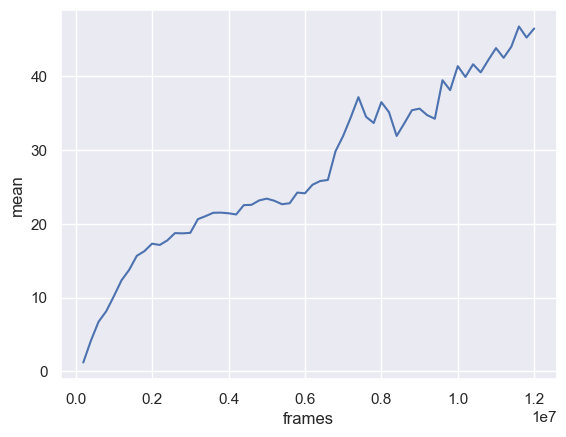

In [ ]:
sns.lineplot(data = df, x="frames", y="mean")
plt.show()

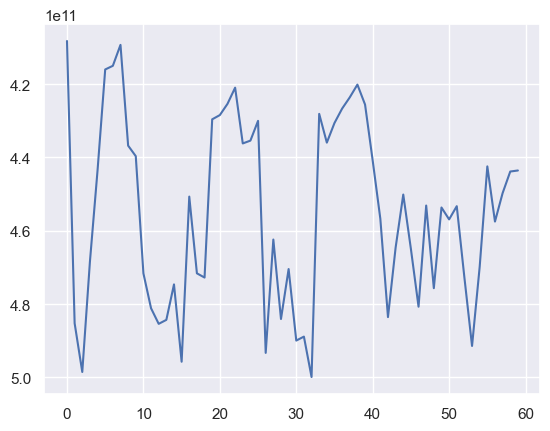

In [ ]:
times = [stat["epoch_time"] for stat in training_stats]
sns.lineplot(x=range(len(times)), y=times)
plt.show()

### Test dqn agent training

In [1]:
import os, sys
import yaml
import itertools
from pathlib import Path
import datetime
import multiprocessing

proj_root = os.path.dirname(os.path.abspath("."))
sys.path.append(proj_root)

In [6]:
import time
import datetime
import torch
import random
import numpy as np
import os
from pathlib import Path
import argparse

import torch.optim as optim
import torch.nn.functional as F

import gym 

from minatar_dqn.replay_buffer import ReplayBuffer
from experiments.experiment_utils import seed_everything
from minatar_dqn.utils.my_logging import setup_logger
from minatar_dqn.models import Conv_QNET, Conv_QNET_one

from minatar_dqn.my_dqn import AgentDQN, build_environment


In [7]:
def get_config_paths(path_experiments_configs):
    experiment_config_paths = []
    default_config_path = None
    for root, dirs, files in os.walk(path_experiments_configs):
        for file in files:
            # check if the file has the specified extension
            if file.endswith("yaml"):
                if "default_params" in file:
                    default_config_path = os.path.join(path_experiments_configs, file)
                else:
                    experiment_config_paths.append(
                        os.path.join(path_experiments_configs, file)
                    )

    return default_config_path, experiment_config_paths


def read_config_files(default_config_path, experiment_config_paths):
    """
    Reads the contents of the configuration files and merges them
    with the default configuration.
    The settings in the specific experiments overwrite the settings
    in the default coinfiguration file.
    """
    default_config = None
    if default_config_path:
        with open(default_config_path, "r") as f:
            default_config = yaml.safe_load(f)

    experiment_configs = []
    for config_path in experiment_config_paths:
        # Load specific configuration from specific_config.yaml
        with open(config_path, "r") as f:
            specific_config = yaml.safe_load(f)

        if default_config:
            # Merge the experiment configuration with the default configuration
            config = {**default_config, **specific_config}
        else:
            config = specific_config

        # add original config file to configuration info
        experiment_file_name = os.path.basename(config_path)
        experiment_file_name = experiment_file_name.split(".")[0]
        config["experiment_name"] = experiment_file_name

        experiment_configs.append(config)

    return experiment_configs


def generate_run_configs(experiment_configs, path_experiments_outputs):
    """
    Generates the combination of configurations for each environment and seed
    specified in the training_configs.

    Args:
        experiment_configs:
        path_experiments_outputs:
    Returns:
        List that contains the individual experiments to be run.
    """
    runs_configs = []
    for experiment in experiment_configs:
        combinations = list(
            itertools.product(experiment["environments"], experiment["seeds"])
        )

        for env_seed_pair in combinations:
            single_experiment = {
                key: value
                for key, value in experiment.items()
                if key not in ["environments", "seeds"]
            }
            # add base output path
            single_experiment["path_experiments_outputs"] = path_experiments_outputs
            single_experiment["environment"] = env_seed_pair[0]
            single_experiment["seed"] = env_seed_pair[1]
            runs_configs.append(single_experiment)

    return runs_configs


def create_path_to_experiment_folder(
    config,
    experiments_output_folder,
    timestamp_folder=None,
    previous_run_timestamp=False,
):
    """
    Build the path for the nested experiment structure:
    base_outputs / timestamp / experiment / environment / seed

    Args:
        config: configuration of the experiment
        experiments_output_folder: root path for the folder where the outputs
        of paralelized experiments are stored
        starting_timestamp: timestamp to be used to create the timestamp level folder
        previous_run_timestamp: Specifies if the 'experiments_output_folder' timestamp
        is associated with a previous training run 

    Returns:
        The path to the folder that stores the output for this singular experiment

    """

    experiment = config["experiment_name"]
    env = config["environment"]
    seed = config["seed"]

    if previous_run_timestamp:
        # build path and check that it exists
        exp_folder_path = os.path.join(
            experiments_output_folder,
            timestamp_folder,
            experiment,
            env,
            str(seed),
        )
        if not os.path.exists(experiments_output_folder):
            raise ValueError(
                f"Could not find and existing path from a previous training run at: {experiments_output_folder}. \
                Check the value of the timestamp folder again."
            )

    else:
        # build path and create the folder
        if timestamp_folder is None:
            timestamp_folder = datetime.datetime.now().strftime(
                r"%Y_%m_%d-%H_%M_%S"
            )
        
        exp_folder_path = os.path.join(
            experiments_output_folder,
            timestamp_folder,
            experiment,
            env,
            str(seed),
        )
        Path(exp_folder_path).mkdir(parents=True, exist_ok=True)

    return exp_folder_path


def get_training_file_names(exp_folder_path, experiment_file_string):

    model_file_name = os.path.join(exp_folder_path, experiment_file_string + "_model")
    replay_buffer_file = os.path.join(
        exp_folder_path, experiment_file_string + "_replay_buffer"
    )
    train_stats_file = os.path.join(
        exp_folder_path, experiment_file_string + "_train_stats"
    )

    return {
        "model_file": model_file_name,
        "replay_buffer_file": replay_buffer_file,
        "train_stats_file": train_stats_file,
    }

In [8]:
seed_everything(0)

config_folder = r"D:\Work\PhD\minatar_work\experiments\training\training_configs"
file_dir = os.path.dirname(os.path.abspath(config_folder))
path_experiments_configs = os.path.join(file_dir, "training_configs")
path_experiments_outputs = os.path.join(file_dir, "outputs")

default_config_path, experiment_config_paths = get_config_paths(
    path_experiments_configs
)

experiment_configs = read_config_files(default_config_path, experiment_config_paths)

runs_configs = generate_run_configs(experiment_configs, path_experiments_outputs)

config = runs_configs[0]

In [9]:
config

{'epochs_to_train': 10,
 'agent_params': {'agent': 'AgentDQN',
  'args_': {'train_step_cnt': 200000,
   'validation_enabled': True,
   'validation_step_cnt': 125000,
   'validation_epsilon': 0.001,
   'replay_start_size': 5000,
   'batch_size': 32,
   'training_freq': 4,
   'target_model_update_freq': 100,
   'loss_fcn': 'mse_loss',
   'gamma': 0.99,
   'epsilon': {'start': 1.0, 'end': 0.01, 'decay': 250000}}},
 'estimator': {'model': 'Conv_QNET', 'args_': {'conv_hidden_out_size': 16}},
 'optim': {'name': 'Adam', 'args_': {'lr': 6.25e-05, 'eps': 0.00015}},
 'replay_buffer': {'max_size': 100000, 'action_dim': 1, 'n_step': 0},
 'experiment_descript': 'Run with default configs',
 'experiment_name': 'conv_model_16',
 'path_experiments_outputs': 'D:\\Work\\PhD\\minatar_work\\experiments\\training\\outputs',
 'environment': 'breakout',
 'seed': 0}

In [10]:
path_experiments_outputs = config["path_experiments_outputs"]
exp_folder_path = create_path_to_experiment_folder(
    config,
    path_experiments_outputs,
    # timestamp_folder=config["experiment_start_timestamp"],
)

experiment_file_string = (
    f'{config["experiment_name"]}_{config["environment"]}_{config["seed"]}'
)

logs_folder = os.path.join(exp_folder_path, "logs")
Path(logs_folder).mkdir(parents=True, exist_ok=True)

env_name = config["environment"]
logger = setup_logger(
    env_name=env_name,
    # folder_path=logs_folder,
    identifier_string=experiment_file_string,
)
logger.info(
    f'Starting up experiment: {config["experiment_name"]}, environment: {config["environment"]}, seed: {config["seed"]}'
)

### Setup environments ###
train_env = build_environment(
    game_name=config["environment"], random_seed=config["seed"]
)
validation_env = build_environment(
    game_name=config["environment"], random_seed=config["seed"]
)

### Setup output and loading paths ###

output_files_paths = get_training_file_names(
    exp_folder_path, experiment_file_string
)

load_file_paths = None
if "restart_training_timestamp" in config:
    path_previous_experiments_outputs = create_path_to_experiment_folder(
        config, path_experiments_outputs, config["restart_training_timestamp"],
        previous_run_timestamp = True
    )
    load_file_paths = get_training_file_names(
        path_previous_experiments_outputs, experiment_file_string
    )

config["output_files_paths"] = output_files_paths
config["load_file_paths"] = load_file_paths

config_to_record = os.path.join(exp_folder_path, f"{experiment_file_string}_config")
with open(config_to_record, "w") as file:
    yaml.dump(config, file)

experiment_agent = AgentDQN(
    train_env=train_env,
    validation_env=validation_env,
    output_files_paths=output_files_paths,
    load_file_paths=load_file_paths,
    save_checkpoints=True,
    logger=logger,
    config=config,
)
# experiment_agent.train(train_epochs=1)
# experiment_agent.train(1)

logger.info(
    f'Finished training experiment: {config["experiment_name"]}, environment: {config["environment"]}, seed: {config["seed"]}'
)



2023-03-15 22:40:11,434 - root - INFO - conv_model_16_breakout_0 - Starting up experiment: conv_model_16, environment: breakout, seed: 0
2023-03-15 22:40:11,440 - root - INFO - conv_model_16_breakout_0 - Loaded configuration settings.
2023-03-15 22:40:11,444 - root - INFO - conv_model_16_breakout_0 - Initialized newtworks and optimizer.
2023-03-15 22:40:11,445 - root - INFO - conv_model_16_breakout_0 - Finished training experiment: conv_model_16, environment: breakout, seed: 0


c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment MinAtar/Breakout-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\utils\passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: bool. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\utils\passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(


In [15]:

device = "cpu"
start_time = datetime.datetime.now()

# self.logger.info(f"Starting training epoch at t = {self.t}")
epoch_t = 0
policy_trained_times = 0
target_trained_times = 0

epoch_episode_rewards = []
epoch_episode_nr_frames = []
epoch_losses = []
epoch_max_qs = []

start_time = datetime.datetime.now()
while epoch_t < experiment_agent.train_step_cnt:
    
    policy_trained_times = 0
    target_trained_times = 0

    is_terminated = False
    while (not is_terminated) and (
        epoch_t < experiment_agent.train_step_cnt
    ):  # can early stop episode if the frame limit was reached

        action, max_q = experiment_agent.select_action(experiment_agent.train_s, experiment_agent.t, experiment_agent.num_actions)
        s_prime, reward, is_terminated, _, _ = experiment_agent.train_env.step(action)

        # reward = torch.tensor([[reward]], device=device).float()
        # is_terminated = torch.tensor([[is_terminated]], device=device)

        experiment_agent.replay_buffer.append(experiment_agent.train_s, action, reward, s_prime, is_terminated)

        experiment_agent.max_qs.append(max_q)

        # Start learning when there's enough data and when we can sample a batch of size BATCH_SIZE
        if (
            experiment_agent.t > experiment_agent.replay_start_size
            and len(experiment_agent.replay_buffer) >= experiment_agent.batch_size
        ):
            # Train every training_freq number of frames
            if experiment_agent.t % experiment_agent.training_freq == 0:
                sample = experiment_agent.replay_buffer.sample(experiment_agent.batch_size)
                loss_val = experiment_agent.model_learn(sample)

                experiment_agent.losses.append(loss_val)
                experiment_agent.policy_model_update_counter += 1
                policy_trained_times += 1

            # Update the target network only after some number of policy network updates
            if (
                experiment_agent.policy_model_update_counter > 0
                and experiment_agent.policy_model_update_counter % experiment_agent.target_model_update_freq
                == 0
            ):
                experiment_agent.target_model.load_state_dict(experiment_agent.policy_model.state_dict())
                target_trained_times += 1

        experiment_agent.current_episode_reward += reward

        experiment_agent.t += 1
        epoch_t += 1
        experiment_agent.ep_frames += 1

        # Continue the process
        experiment_agent.train_s  = s_prime
        
    policy_trained_times += policy_trained_times
    target_trained_times += target_trained_times

    if is_terminated:
        # we only want to append these stats if the episode was completed,
        # otherwise it means it was stopped due to the nr of frames criterion
        epoch_episode_rewards.append(experiment_agent.current_episode_reward)
        epoch_episode_nr_frames.append(experiment_agent.ep_frames)
        epoch_losses.extend(experiment_agent.losses)
        epoch_max_qs.extend(experiment_agent.max_qs)

        experiment_agent.episodes += 1
        experiment_agent.reset_training_episode_tracker()

ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_epsiode
ended_

In [16]:
p_train_stats = experiment_agent.compute_training_epoch_stats(
                epoch_episode_rewards,
                epoch_episode_nr_frames,
                policy_trained_times,
                target_trained_times,
                epoch_losses,
                epoch_max_qs,
                "one hour fiddy",
            )

p_train_stats

{'frame_stamp': 400000,
 'episode_rewards': {'min': 0.0,
  'max': 21.0,
  'mean': 4.706818181818182,
  'median': 5.0,
  'std': 2.3427497176756678},
 'episode_frames': {'min': 6,
  'max': 196,
  'mean': 56.81875,
  'median': 60.0,
  'std': 25.82130662283044},
 'episode_losses': {'min': 0.0036586769856512547,
  'max': 3.0070900917053223,
  'mean': 0.1149309263856517,
  'median': 0.0592774823307991,
  'std': 0.16491142380506765},
 'episode_max_qs': {'min': -2.8881940841674805,
  'max': 7.034607410430908,
  'mean': 3.755640235284864,
  'median': 4.093081951141357,
  'std': 1.5572996508284502},
 'policy_trained_times': 2,
 'target_trained_times': 0,
 'epoch_time': 'one hour fiddy'}

In [13]:
experiment_agent.training_stats

[]

In [12]:
len(experiment_agent.replay_buffer)

100000

In [12]:
sample = experiment_agent.replay_buffer.sample(3)
len(sample)

<built-in method size of Tensor object at 0x0000027929F6FBF0>


ValueError: could not broadcast input array from shape (10,4,10) into shape (4,10,10)

In [43]:
samples = random.sample(experiment_agent.replay_buffer.buffer, 2)

In [44]:
len(samples)

2

In [45]:
sample = samples[0]
len(sample)

5

In [48]:
sample[0].shape

torch.Size([1, 10, 4, 10])

In [13]:
experiment_agent.train_s.shape

torch.Size([1, 10, 4, 10])

In [19]:
%load_ext autoreload
%autoreload 2

In [20]:
import gym
g_string = "Breakout-v0"
env = gym.make(f"MinAtar/{g_string}")

env.observation_space



c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\envs\registration.py:555: UserWarning: WARN: The environment MinAtar/Breakout-v0 is out of date. You should consider upgrading to version `v1`.
  logger.warn(
c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\utils\passive_env_checker.py:20: UserWarning: WARN: It seems a Box observation space is an image but the `dtype` is not `np.uint8`, actual type: bool. If the Box observation space is not an image, we recommend flattening the observation to have only a 1D vector.
  logger.warn(
c:\Users\Chainsword\anaconda3\envs\general\lib\site-packages\gym\utils\passive_env_checker.py:25: UserWarning: WARN: It seems a Box observation space is an image but the upper and lower bounds are not in [0, 255]. Generally, CNN policies assume observations are within that range, so you may encounter an issue if the observation values are not.
  logger.warn(


Box(False, True, (10, 10, 4), bool)

In [21]:
init_s, info = env.reset()

In [22]:
init_s.shape

(10, 10, 4)

In [23]:


from minatar_dqn.minatar_gym_wrappers import PermuteMinatarObsSpace

w_env = PermuteMinatarObsSpace(env)
init_s, info = w_env.reset()
init_s.shape

(4, 10, 10)

In [24]:
w_env.observation_space

Box(False, True, (10, 10, 4), bool)

In [26]:
res = w_env.step(1)

In [49]:
res[0].shape

(4, 10, 10)

In [33]:
res[1]

0

In [34]:
res[2]

False

In [35]:
res[3]

False

In [36]:
res[4]

{}

In [32]:
res[2].shape

AttributeError: 'bool' object has no attribute 'shape'